___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

***

In [2]:
df = pd.read_csv('cleaned_police.csv')

C:\Users\ihakk\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.is_arrested.mean()

0.03454755048024903

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480584 entries, 0 to 480583
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   stop_datetime       480584 non-null  object 
 1   id                  480584 non-null  object 
 2   location_raw        480584 non-null  object 
 3   police_department   480584 non-null  object 
 4   driver_gender       480584 non-null  object 
 5   driver_age_raw      480583 non-null  float64
 6   driver_age          478946 non-null  float64
 7   driver_race_raw     480584 non-null  object 
 8   driver_race         480584 non-null  object 
 9   violation_raw       480584 non-null  object 
 10  violation           480584 non-null  object 
 11  search_conducted    480584 non-null  bool   
 12  search_type_raw     17762 non-null   object 
 13  search_type         17762 non-null   object 
 14  contraband_found    480584 non-null  bool   
 15  stop_outcome        480584 non-nul

In [5]:
df['stop_datetime'] = pd.to_datetime(df.stop_datetime)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480584 entries, 0 to 480583
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   stop_datetime       480584 non-null  datetime64[ns]
 1   id                  480584 non-null  object        
 2   location_raw        480584 non-null  object        
 3   police_department   480584 non-null  object        
 4   driver_gender       480584 non-null  object        
 5   driver_age_raw      480583 non-null  float64       
 6   driver_age          478946 non-null  float64       
 7   driver_race_raw     480584 non-null  object        
 8   driver_race         480584 non-null  object        
 9   violation_raw       480584 non-null  object        
 10  violation           480584 non-null  object        
 11  search_conducted    480584 non-null  bool          
 12  search_type_raw     17762 non-null   object        
 13  search_type         17762 non

In [7]:
df1 = df.groupby(df.stop_datetime.dt.hour)['is_arrested'].mean()
df1

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [8]:
df['hourly_arrested_rate'] = df1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480584 entries, 0 to 480583
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   stop_datetime         480584 non-null  datetime64[ns]
 1   id                    480584 non-null  object        
 2   location_raw          480584 non-null  object        
 3   police_department     480584 non-null  object        
 4   driver_gender         480584 non-null  object        
 5   driver_age_raw        480583 non-null  float64       
 6   driver_age            478946 non-null  float64       
 7   driver_race_raw       480584 non-null  object        
 8   driver_race           480584 non-null  object        
 9   violation_raw         480584 non-null  object        
 10  violation             480584 non-null  object        
 11  search_conducted      480584 non-null  bool          
 12  search_type_raw       17762 non-null   object        
 13 

In [10]:
df.hourly_arrested_rate


0         0.052151
1         0.067127
2         0.061067
3         0.052613
4         0.053897
            ...   
480579         NaN
480580         NaN
480581         NaN
480582         NaN
480583         NaN
Name: hourly_arrested_rate, Length: 480584, dtype: float64

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [11]:
import matplotlib.pyplot as plt

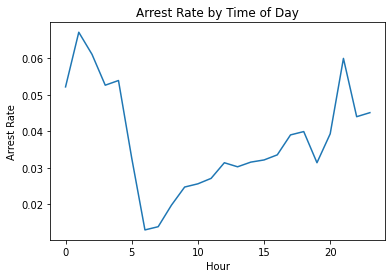

In [12]:
fig,ax = plt.subplots()
ax.plot(df.hourly_arrested_rate)
ax.set_xlabel('Hour')
ax.set_ylabel('Arrest Rate')
ax.set_title('Arrest Rate by Time of Day')
plt.show()

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480584 entries, 0 to 480583
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   stop_datetime         480584 non-null  datetime64[ns]
 1   id                    480584 non-null  object        
 2   location_raw          480584 non-null  object        
 3   police_department     480584 non-null  object        
 4   driver_gender         480584 non-null  object        
 5   driver_age_raw        480583 non-null  float64       
 6   driver_age            478946 non-null  float64       
 7   driver_race_raw       480584 non-null  object        
 8   driver_race           480584 non-null  object        
 9   violation_raw         480584 non-null  object        
 10  violation             480584 non-null  object        
 11  search_conducted      480584 non-null  bool          
 12  search_type_raw       17762 non-null   object        
 13 

In [14]:
df['annual_drug_rate'] = df.groupby(df.stop_datetime.dt.year)['drugs_related_stop'].mean()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480584 entries, 0 to 480583
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   stop_datetime         480584 non-null  datetime64[ns]
 1   id                    480584 non-null  object        
 2   location_raw          480584 non-null  object        
 3   police_department     480584 non-null  object        
 4   driver_gender         480584 non-null  object        
 5   driver_age_raw        480583 non-null  float64       
 6   driver_age            478946 non-null  float64       
 7   driver_race_raw       480584 non-null  object        
 8   driver_race           480584 non-null  object        
 9   violation_raw         480584 non-null  object        
 10  violation             480584 non-null  object        
 11  search_conducted      480584 non-null  bool          
 12  search_type_raw       17762 non-null   object        
 13 

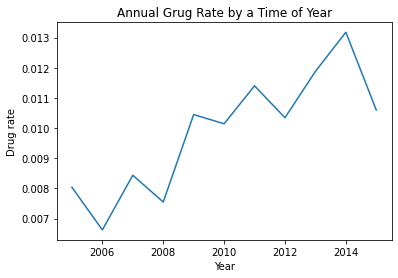

In [16]:
fig, ax = plt.subplots()
ax.plot(df.annual_drug_rate)
ax.set_xlabel('Year')
ax.set_ylabel('Drug rate')
ax.set_title('Annual Grug Rate by a Time of Year')
plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [17]:
df['annual_search_rate'] = df.groupby(df.stop_datetime.dt.year)['search_conducted'].mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480584 entries, 0 to 480583
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   stop_datetime         480584 non-null  datetime64[ns]
 1   id                    480584 non-null  object        
 2   location_raw          480584 non-null  object        
 3   police_department     480584 non-null  object        
 4   driver_gender         480584 non-null  object        
 5   driver_age_raw        480583 non-null  float64       
 6   driver_age            478946 non-null  float64       
 7   driver_race_raw       480584 non-null  object        
 8   driver_race           480584 non-null  object        
 9   violation_raw         480584 non-null  object        
 10  violation             480584 non-null  object        
 11  search_conducted      480584 non-null  bool          
 12  search_type_raw       17762 non-null   object        
 13 

In [18]:
df.annual_search_rate.value_counts()

0.032278    1
0.050692    1
0.037748    1
0.049849    1
0.041844    1
0.027832    1
0.029054    1
0.039544    1
0.030157    1
0.042089    1
0.037767    1
Name: annual_search_rate, dtype: int64

In [19]:
series_search = df.annual_search_rate.dropna()
series_search

2005    0.050692
2006    0.037748
2007    0.041844
2008    0.039544
2009    0.049849
2010    0.042089
2011    0.037767
2012    0.032278
2013    0.029054
2014    0.030157
2015    0.027832
Name: annual_search_rate, dtype: float64

In [20]:
series_drug = df.annual_drug_rate.dropna()
series_drug

2005    0.008038
2006    0.006624
2007    0.008437
2008    0.007549
2009    0.010447
2010    0.010142
2011    0.011400
2012    0.010343
2013    0.011879
2014    0.013176
2015    0.010598
Name: annual_drug_rate, dtype: float64

In [21]:
df_annual = pd.concat([series_search, series_drug],axis=1, join='outer')

In [22]:
df_annual

,annual_search_rate,annual_drug_rate
2005,0.050692,0.008038
2006,0.037748,0.006624
2007,0.041844,0.008437
2008,0.039544,0.007549
2009,0.049849,0.010447
2010,0.042089,0.010142
2011,0.037767,0.011400
2012,0.032278,0.010343
2013,0.029054,0.011879
2014,0.030157,0.013176


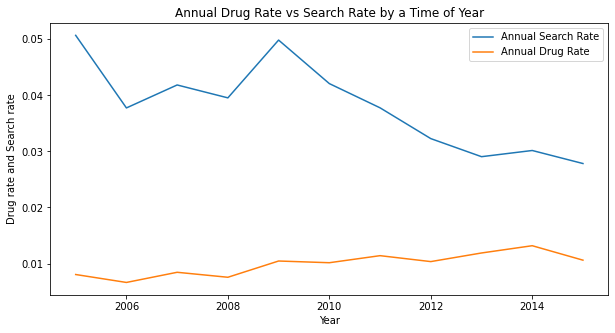

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_annual.annual_search_rate, label='Annual Search Rate')
ax.plot(df_annual.annual_drug_rate, label='Annual Drug Rate')
ax.set_xlabel('Year')
ax.set_ylabel('Drug rate and Search rate')
ax.set_title('Annual Drug Rate vs Search Rate by a Time of Year')
ax.legend()
plt.show()

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480584 entries, 0 to 480583
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   stop_datetime         480584 non-null  datetime64[ns]
 1   id                    480584 non-null  object        
 2   location_raw          480584 non-null  object        
 3   police_department     480584 non-null  object        
 4   driver_gender         480584 non-null  object        
 5   driver_age_raw        480583 non-null  float64       
 6   driver_age            478946 non-null  float64       
 7   driver_race_raw       480584 non-null  object        
 8   driver_race           480584 non-null  object        
 9   violation_raw         480584 non-null  object        
 10  violation             480584 non-null  object        
 11  search_conducted      480584 non-null  bool          
 12  search_type_raw       17762 non-null   object        
 13 

In [25]:
all_zones = pd.crosstab(df.district, df.violation)

In [26]:
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [27]:
k_zones = all_zones.loc['Zone K1':'Zone K3']

In [28]:
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

<AxesSubplot:xlabel='district'>

<Figure size 1080x576 with 0 Axes>

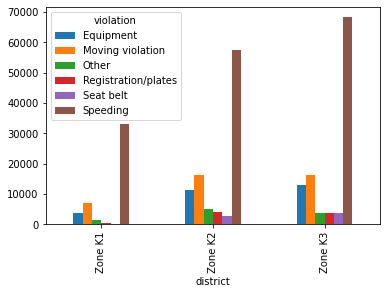

In [29]:
plt.figure(figsize=(15,8))
k_zones.plot.bar()

In [30]:
pd.DataFrame(k_zones)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

<AxesSubplot:xlabel='district'>

<Figure size 1080x576 with 0 Axes>

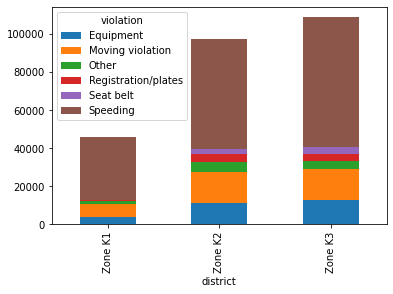

In [31]:
plt.figure(figsize=(15,8))
k_zones.plot.bar(stacked=True)

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [32]:
df.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [33]:
mapping = dict([('0-15 Min', 8), ('16-30 Min', 23), ('30+ Min', 45)])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480584 entries, 0 to 480583
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   stop_datetime         480584 non-null  datetime64[ns]
 1   id                    480584 non-null  object        
 2   location_raw          480584 non-null  object        
 3   police_department     480584 non-null  object        
 4   driver_gender         480584 non-null  object        
 5   driver_age_raw        480583 non-null  float64       
 6   driver_age            478946 non-null  float64       
 7   driver_race_raw       480584 non-null  object        
 8   driver_race           480584 non-null  object        
 9   violation_raw         480584 non-null  object        
 10  violation             480584 non-null  object        
 11  search_conducted      480584 non-null  bool          
 12  search_type_raw       17762 non-null   object        
 13 

In [35]:
df['stop_minutes'] = df.stop_duration.replace(mapping, value=None )

In [36]:
df.stop_minutes

0          8
1         23
2          8
3          8
4         45
          ..
480579     8
480580     8
480581     8
480582     8
480583     8
Name: stop_minutes, Length: 480584, dtype: object

In [37]:
df['stop_minutes'] = df.stop_minutes.astype('int')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480584 entries, 0 to 480583
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   stop_datetime         480584 non-null  datetime64[ns]
 1   id                    480584 non-null  object        
 2   location_raw          480584 non-null  object        
 3   police_department     480584 non-null  object        
 4   driver_gender         480584 non-null  object        
 5   driver_age_raw        480583 non-null  float64       
 6   driver_age            478946 non-null  float64       
 7   driver_race_raw       480584 non-null  object        
 8   driver_race           480584 non-null  object        
 9   violation_raw         480584 non-null  object        
 10  violation             480584 non-null  object        
 11  search_conducted      480584 non-null  bool          
 12  search_type_raw       17762 non-null   object        
 13 

In [39]:
df.stop_minutes.unique()

array([ 8, 23, 45,  2,  1])

***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [40]:
df.groupby('violation_raw')[['stop_minutes']].mean()

,stop_minutes
violation_raw,
APB,18.593814
Call for Service,21.963314
Equipment/Inspection Violation,11.454155
Motorist Assist/Courtesy,17.629929
Other Traffic Violation,13.833943
Registration Violation,13.543268
Seatbelt Violation,9.698236
Special Detail/Directed Patrol,14.876778
Speeding,10.589143


In [69]:
stop_length = df.groupby('violation_raw')['stop_minutes'].mean()

In [77]:
df.drop(columns=['stop_length'], axis=0)

,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,stop_duration,out_of_state,drugs_related_stop,district,combined,frisk,hourly_arrested_rate,annual_drug_rate,annual_search_rate,stop_minutes
0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,0-15 Min,False,False,Zone K1,2005-01-02 01:55,False,0.052151,NaN,NaN,8
1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,16-30 Min,False,False,Zone X4,2005-01-02 20:30,False,0.067127,NaN,NaN,23
2,2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,0-15 Min,False,False,Zone X4,2005-01-04 12:55,False,0.061067,NaN,NaN,8
3,2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,0-15 Min,False,False,Zone X4,2005-01-06 01:30,False,0.052613,NaN,NaN,8
4,2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,30+ Min,True,False,Zone X1,2005-01-12 08:05,False,0.053897,NaN,NaN,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480579,2015-12-31 22:46:00,RI-2015-47061,Zone X1,0.0,M,1959.0,56.0,H,Hispanic,Speeding,...,0-15 Min,True,False,Zone X1,2015-12-31 22:46,False,NaN,NaN,NaN,8
480580,2015-12-31 22:47:00,RI-2015-47062,Zone X4,500.0,M,1988.0,27.0,W,White,Registration Violation,...,0-15 Min,False,False,Zone X4,2015-12-31 22:47,False,NaN,NaN,NaN,8
480581,2015-12-31 23:08:00,RI-2015-47063,Zone X3,200.0,M,1980.0,35.0,H,Hispanic,Equipment/Inspection Violation,...,0-15 Min,False,False,Zone X3,2015-12-31 23:08,False,NaN,NaN,NaN,8
480582,2015-12-31 23:44:00,RI-2015-47064,Zone K2,900.0,M,1984.0,31.0,W,White,Speeding,...,0-15 Min,False,False,Zone K2,2015-12-31 23:44,False,NaN,NaN,NaN,8


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480584 entries, 0 to 480583
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   stop_datetime         480584 non-null  datetime64[ns]
 1   id                    480584 non-null  object        
 2   location_raw          480584 non-null  object        
 3   police_department     480584 non-null  object        
 4   driver_gender         480584 non-null  object        
 5   driver_age_raw        480583 non-null  float64       
 6   driver_age            478946 non-null  float64       
 7   driver_race_raw       480584 non-null  object        
 8   driver_race           480584 non-null  object        
 9   violation_raw         480584 non-null  object        
 10  violation             480584 non-null  object        
 11  search_conducted      480584 non-null  bool          
 12  search_type_raw       17762 non-null   object        
 13 

<AxesSubplot:ylabel='violation_raw'>

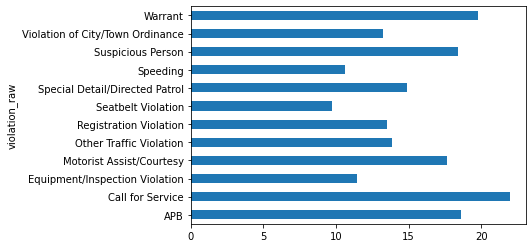

In [79]:
stop_length.plot.barh()